In [29]:
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.preprocessing import image
from tensorflow.image import resize, convert_image_dtype

import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
(train_images, train_labels), (test_images, test_labels) = df

In [5]:
# Вывести информацию о форме обучающих данных и меток
print("Форма обучающих изображений:", train_images.shape)
print("Форма обучающих меток:", train_labels.shape)

# Вывести информацию о форме тестовых данных и меток
print("Форма тестовых изображений:", test_images.shape)
print("Форма тестовых меток:", test_labels.shape)

Форма обучающих изображений: (60000, 28, 28)
Форма обучающих меток: (60000,)
Форма тестовых изображений: (10000, 28, 28)
Форма тестовых меток: (10000,)


In [6]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

In [7]:
class_names = ['Футболка / топ', "Шорты", "Свитер", "Платье",
              "Плащ", "Сандали", "Рубашка", "Кроссовок", "Сумка",
              "Ботинок"]

In [8]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels


In [9]:
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

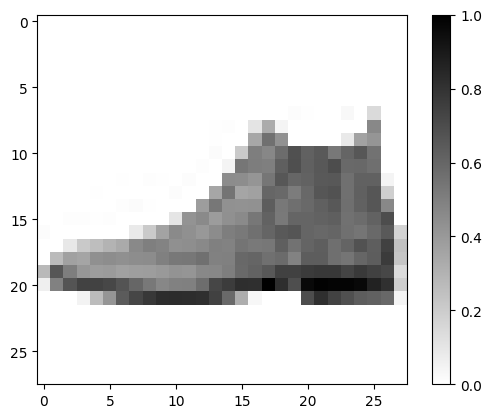

In [10]:
for image, label in test_dataset.take(1):
  break;
image = image.numpy().reshape((28, 28))

# отрисовываем изображение
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

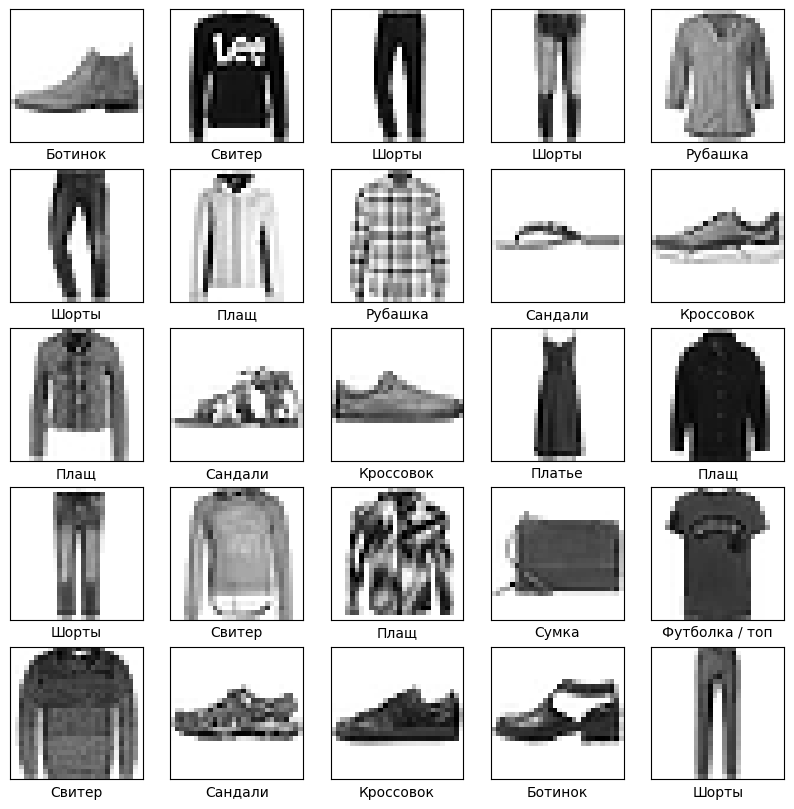

In [11]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i += 1
plt.show()

Подивились на наші екземпляри

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [13]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(60000).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [15]:
steps_per_epoch = math.ceil(len(train_images) / BATCH_SIZE)

In [17]:
tf.summary.create_file_writer('C:/Users/lemes/Downloads/logs')

In [25]:
'''
Тут сделаем не большое уточнение - путь должен быть только на английком, и без пробелов
log_dir = 'C:/Users/lemes/OneDrive/Рабочий стол/Домашки DataScience/logs'
этот путь не работает



log_dir = 'C:/Users/lemes/Downloads/logs'
этот путь работает

далее командой запускаем локальный сервер из cmd
tensorboard --logdir="logs"



tf.summary.create_file_writer(log_dir)
'''

'\nТут сделаем не большое уточнение - путь должен быть только на английком, и без пробелов\nlog_dir = \'C:/Users/lemes/OneDrive/Рабочий стол/Домашки DataScience/logs\'\nэтот путь не работает\n\n\n\nlog_dir = \'C:/Users/lemes/Downloads/logs\'\nэтот путь работает\n\nдалее командой запускаем локальный сервер из cmd\ntensorboard --logdir="logs"\n\n\n\ntf.summary.create_file_writer(log_dir)\n'

In [18]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='C:/Users/lemes/Downloads/logs', histogram_freq=1)

In [19]:
mdl = model.fit(train_dataset, epochs=50, steps_per_epoch=steps_per_epoch, validation_data=test_dataset, callbacks=[tensorboard_callback])

Epoch 1/50
1875/1875 [==============================] - 45s 23ms/step - loss: 0.3950 - accuracy: 0.8559 - val_loss: 0.3083 - val_accuracy: 0.8913
Epoch 2/50
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2533 - accuracy: 0.9070 - val_loss: 0.2786 - val_accuracy: 0.9006
Epoch 3/50
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2129 - accuracy: 0.9220 - val_loss: 0.2580 - val_accuracy: 0.9080
Epoch 4/50
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1796 - accuracy: 0.9330 - val_loss: 0.2349 - val_accuracy: 0.9185
Epoch 5/50
1875/1875 [==============================] - 48s 26ms/step - loss: 0.1564 - accuracy: 0.9416 - val_loss: 0.2525 - val_accuracy: 0.9102
Epoch 6/50
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1326 - accuracy: 0.9501 - val_loss: 0.2701 - val_accuracy: 0.9104
Epoch 7/50
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1108 - accuracy: 0.9587 - val_loss: 0.2659 -

на графиках которые у нас есть, можно заметить что наша модель переобучалась
попробуем добавить слой 
tf.keras.layers.Dropout(0.2)

In [20]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [21]:
model2.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Також можна побачити, що вже після 20ої епохи ми навчаємось на незначні відсотки, тому оберемо для тренування цієї моделі саме 20 епох

In [23]:
mdl2 = model2.fit(train_dataset, epochs=20, steps_per_epoch=steps_per_epoch, validation_data=test_dataset, callbacks=[tensorboard_callback])

Epoch 1/20
1875/1875 [==============================] - 44s 22ms/step - loss: 0.4227 - accuracy: 0.8470 - val_loss: 0.3360 - val_accuracy: 0.8749
Epoch 2/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2827 - accuracy: 0.8972 - val_loss: 0.2813 - val_accuracy: 0.8980
Epoch 3/20
1875/1875 [==============================] - 63s 34ms/step - loss: 0.2339 - accuracy: 0.9136 - val_loss: 0.2580 - val_accuracy: 0.9062
Epoch 4/20
1875/1875 [==============================] - 91s 49ms/step - loss: 0.2072 - accuracy: 0.9227 - val_loss: 0.2698 - val_accuracy: 0.9052
Epoch 5/20
1875/1875 [==============================] - 63s 33ms/step - loss: 0.1875 - accuracy: 0.9304 - val_loss: 0.2281 - val_accuracy: 0.9192
Epoch 6/20
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1607 - accuracy: 0.9399 - val_loss: 0.2354 - val_accuracy: 0.9176
Epoch 7/20
1875/1875 [==============================] - 44s 24ms/step - loss: 0.1438 - accuracy: 0.9459 - val_loss: 0.2743 -

In [24]:
step = math.ceil(len(test_dataset) / BATCH_SIZE)

In [25]:
test_loss, test_accuracy = model2.evaluate(test_dataset, steps=step)
print("Точность на тестовом наборе данных: ", test_accuracy)

10/10 [==============================] - 0s 8ms/step - loss: 0.2831 - accuracy: 0.9406
Точность на тестовом наборе данных:  0.940625011920929


Подивимось як працюють вже готові моделі

In [26]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


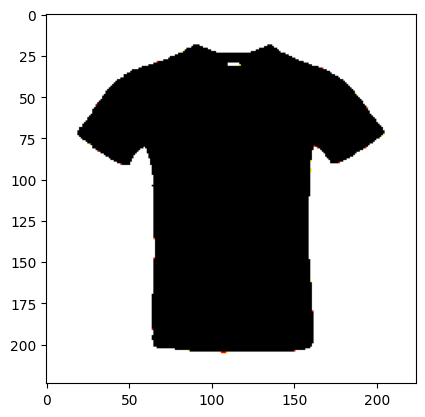

In [32]:
ready_mod = tf.keras.applications.ConvNeXtBase()
img_path = 'C:/Users/lemes/Downloads/019_42_101_f-2018_01.jpg_l.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

plt.imshow(x[0])
plt.show()


In [33]:
preds = ready_mod.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 7s 7s/step
Predicted: [('n03595614', 'jersey', 0.9129519), ('n04370456', 'sweatshirt', 0.0023737915), ('n02916936', 'bulletproof_vest', 0.0019578673)]
